## Steam Game Reviews Sentiment Analysis

Steam is the largest digital video game distribution service for video games in the PC market. Each day, hundreds of games are released on Steam along with thousands of game reviews. Since video games are getting more and more expensive, these reviews are tremendously helpful for gamers to narrow down their choices to just a few games with the most positive (or avoid the ones with the most negative) reviews. But with thousands of reviews, who has time to read through every single one of them? Ah! That's where Word Cloud comes in!

## So What Exactly Is Word Cloud and How Does It Work?

Well, for starters, it's an excellent text visualization technique for people like me who hate to read through thousands of reviews to purchase a game. Noboby's got time for that! Instead, I want a concise way to visualize the most frequently occurred words in these thousand reviews to give me an idea of what the general sentiment is for a particular game.

Word clouds display the frequency of certain words by scaling the their sizes and using different colors. For example, a word which appears 100 times in a text will be smaller than another word that appears 500 times, and the more frequently occured word will appear in a more vibrant color to attract attention to it in a word cloud. 

Word clouds are best when we need to quantitatively visualize unstructured data such as tweets, RSS feed, game reviews, etc. that have many categories or terms. This kind of data is very hard to visualize in a tradtional historgram or scatter plots. For example, the CSV file I am using for this assignment has ~435K reviews. Just imagine how many histograms or dots on the scatter plots are needed to display that many words!

One drawback of word clouds is that they don't provide the context of the words they represent. For example, if the word "don't" happen to be the second most frequently occured word in 5000 reviews, should I understand it as "don't buy this game because this is bad" or "I will regret if I don't buy this game"? Without a general background knowledge of how game reviews and Natural Langage Processing work, word clouds should not be solely trusted to extract decision-making information (as I will show later on). 

## Choices for Libraries

Hmmm...If I want to plot word clouds, what Python library would make the most sense? Ah! Wonderful Pythonians before me thought of this and named the library exactly that, wordcloud! The worldcloud library is based on numpy and pillow, though matplotlib is also used if you want to save the cloud image to a file (or display it in the notebook). Although the documentation (http://amueller.github.io/word_cloud/) doesn't say other libraries, I'd take a guess and say it relies on the NLTK library as well since wordcloud itself has the "STOPWORDS" attribute that closely resembles the "stopwords" attribute in the NLTK library.

This library is super easy to install. All you have to do is type 

### $pip install wordcloud

into the terminal, or 

### $conda install -c conda-forge wordcloud

if you're using the conda-forge channel) and whoosh, it's installed and ready to be used in less than 1 minute! The library itself doesn't have the option to display the output image in Jupyter notebook (although you can save it as a picture), so matplotlib will have to be install along side with wordcloud. I thought about horizontal barcharts to display the frequency of the words, but I'd have too many bars on a cluttered plot (and same with scatter plots). 

## OK, Let's Get Started!

First, let's load in the csv file which contains 
the reviews from Steam games and see what we have.

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None, "display.max_columns", None)

reviews_2019= pd.read_csv('steam_reviews.csv')
reviews_2019.head(10)

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight
5,2016-12-12,4,55,2694,False,Recommended,ENGLISH After playing for more than two years ...,Dead by Daylight
6,2017-09-17,12,228,48,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
7,2018-12-24,295,219,71,False,Recommended,I have never been told to kill myself more tha...,Dead by Daylight
8,2018-09-21,2,54,400,False,Recommended,Any longtime Dead by Daylight player knows tha...,Dead by Daylight
9,2018-12-05,380,271,414,False,Recommended,if you think cs go is toxic try this game,Dead by Daylight


 Some initial data cleaning is done here to remove irregular symbols such as trademarks and copyrights from game titles, along changing everything in the "title" column to lower case for easier processing later.

In [2]:
reviews_2019['title']= reviews_2019['title'].str.lower().replace(u'(\N{COPYRIGHT SIGN}|\N{TRADE MARK SIGN}|\N{REGISTERED SIGN})','', regex=True)
reviews_2019['title']= reviews_2019['title'].replace("[^A-Za-z\s]*","", regex=True)
reviews_2019.head(10)

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,expansion hearts of iron iv man the guns
1,2019-02-10,0,0,184,False,Recommended,yes.,expansion hearts of iron iv man the guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,expansion hearts of iron iv man the guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,dead by daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,dead by daylight
5,2016-12-12,4,55,2694,False,Recommended,ENGLISH After playing for more than two years ...,dead by daylight
6,2017-09-17,12,228,48,False,Recommended,Out of all the reviews I wrote This one is pro...,dead by daylight
7,2018-12-24,295,219,71,False,Recommended,I have never been told to kill myself more tha...,dead by daylight
8,2018-09-21,2,54,400,False,Recommended,Any longtime Dead by Daylight player knows tha...,dead by daylight
9,2018-12-05,380,271,414,False,Recommended,if you think cs go is toxic try this game,dead by daylight




Ah, wonderful! Next, let's get a sense of whether a game is well received by calculating the percentage of recommendations vs. non-recommendations for each game. While there are a lot of games in this data set, many of them only have a few reviews and the majority of reviews are concentrated around the most popular games. As the result, I will only consider the 10 games with the most amount of reviews.

In [3]:
recommended= reviews_2019[reviews_2019['recommendation'] == 'Recommended'].groupby('title').size().reset_index().rename(columns={0:'Recommend'})

total_recommendations= reviews_2019.groupby('title')['recommendation'].count().reset_index().rename(columns={'recommendation':'total recommendations'})

not_recommended= reviews_2019[reviews_2019['recommendation'] == 'Not Recommended'].groupby('title').size().reset_index().rename(columns={0:'not recommended'})

recommended= recommended.merge(total_recommendations, how='left', on='title')

final_recommendation= recommended.merge(not_recommended, how='left', on='title')

final_recommendation= final_recommendation[['title','Recommend','not recommended','total recommendations']]

final_recommendation['Favorable %']= (final_recommendation['Recommend']/final_recommendation['total recommendations']*100).round()

final_recommendation['Unfavorable %']= (final_recommendation['not recommended']/final_recommendation['total recommendations']*100).round().fillna('Does not have a negative review')

most_reviews= final_recommendation.sort_values(by='total recommendations', ascending=False).iloc[:10].reset_index().drop(columns='index')

most_reviews

,title,Recommend,not recommended,total recommendations,Favorable %,Unfavorable %
0,playerunknowns battlegrounds,87081,58604.0,145685,60.0,40
1,grand theft auto v,58989,40967.0,99956,59.0,41
2,rust,55785,15303.0,71088,78.0,22
3,rocket league,61743,6164.0,67907,91.0,9
4,dead by daylight,17116,5105.0,22221,77.0,23
5,monster hunter world,14271,4141.0,18412,78.0,22
6,astroneer,2573,88.0,2661,97.0,3
7,the elder scrolls v skyrim special edition,983,490.0,1473,67.0,33
8,resident evil biohazard re,1377,8.0,1385,99.0,1
9,sid meiers civilization vi,351,171.0,522,67.0,33


Ah, this is where the fun begins. Since sentiment analysis with NLTK could be a whole other notebook by itself, I won't get into all the technicals. To make this process easier, I used the VADER lexicon from the VADER Sentiment Analysis toolkit (https://github.com/cjhutto/vaderSentiment) to analyze whether the sentiment of the reviews was positive or negative for a particular game. Here, a compound score > 0.05 indicates a positive sentiment, a compound score between -0.05 and 0.05 indicates a neutral sentiment, and a compound score <= -0.05 indicates a negative sentiment.

Let's do this for all 10 games.

In [4]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer= SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/binhphung1003/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Further data cleaning to remove irregular words and symbols from the reviews themselves. I also added another column to show the sentiment score for each game.

In [5]:
reviews_2019['review']= reviews_2019['review'].replace('[^A-Za-z0-9\s]*','', regex=True).apply(lambda x: str(x))

reviews_2019['sentiment score']= reviews_2019['review'].apply(lambda x: analyzer.polarity_scores(x))

reviews_2019['compound score']= reviews_2019['sentiment score'].apply(lambda dict: dict['compound'])

reviews_2019= reviews_2019.drop(columns=['date_posted', 'funny','helpful','hour_played','is_early_access_review'])

steam_ranking= reviews_2019.groupby(['title','compound score']).count().reset_index().drop(columns=['recommendation', 'review','sentiment score'])

steam_ranking= steam_ranking.groupby('title')['compound score'].mean().reset_index()

most_reviews= most_reviews.merge(steam_ranking, how='left', on='title')

most_reviews

,title,Recommend,not recommended,total recommendations,Favorable %,Unfavorable %,compound score
0,playerunknowns battlegrounds,87081,58604.0,145685,60.0,40,0.018030
1,grand theft auto v,58989,40967.0,99956,59.0,41,0.052313
2,rust,55785,15303.0,71088,78.0,22,0.075882
3,rocket league,61743,6164.0,67907,91.0,9,0.276515
4,dead by daylight,17116,5105.0,22221,77.0,23,0.122817
5,monster hunter world,14271,4141.0,18412,78.0,22,0.246259
6,astroneer,2573,88.0,2661,97.0,3,0.669708
7,the elder scrolls v skyrim special edition,983,490.0,1473,67.0,33,0.553660
8,resident evil biohazard re,1377,8.0,1385,99.0,1,0.474981
9,sid meiers civilization vi,351,171.0,522,67.0,33,0.373616


## Beautiful! Now I know which game to buy and which game to not buy. My picks are Grand Theft Auto V, Resident Evil Biohazard, and The Elder Scrolls V. What's yours?


I am particularly interested in reviews for Grand Theft Auto V to see what people are talking about the most in the reviews. Let's do that!


In [12]:
gta_5= reviews_2019[reviews_2019['title']== 'grand theft auto v'].reset_index().drop(columns=['sentiment score','compound score','title', 'index'])
gta_5.head(10)

,recommendation,review
0,Not Recommended,I love the part in Online where you get banned...
1,Recommended,best Rockstar optimization so farI couldnt sta...
2,Not Recommended,After having bought this game on PS3 PS4 and P...
3,Not Recommended,Pros SP ModdingCons Take Two Interactive
4,Not Recommended,Everything in the game now either flies shoots...
5,Not Recommended,The single player story was fun GTA online is ...
6,Not Recommended,Single player is fun but online has been utter...
7,Not Recommended,Hey forget about all those cool mods buy more ...
8,Not Recommended,Great Campaign Awful Customer Service and Onli...
9,Not Recommended,siki yok


Tokenizing the reviews for analysis. Since we've already cleaned the review texts in the step above, all we have to do now is put all words in lowercase before tokenizing them.

In [7]:
import nltk
nltk.download('punkt')
test= gta_5['review'].str.lower().apply(lambda x: nltk.word_tokenize(x))
test= np.concatenate(test) #The output from nltk is a list of list with each list contains the tokens in each review.
#For next step to work, we have to concatenate all tokens from smaller lists into one giant list.

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/binhphung1003/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Words such as "the", "this", "that", etc. occur quite frequently in the English language but don't add any meaning to the context. They're call "stop words" in NLTK and we'll remove those. I also added several custom stop words specifically for game reviews to avoid meaningless intepretation by the word clouds.

In [8]:
import re
import string
from nltk.corpus import stopwords
english_stopwords= stopwords.words('english')
new_stop_words= ['gta', 'game', 'online', 'play', 'get', 'rockstar', 'games', 'one', 'two', 'would', 'got']
english_stopwords.extend(new_stop_words)

#If the words from the reviews are neither stopwords or punctuation marks, they have meanings and should be
#used to plot the word clouds. The wordcloud library itself has a STOPWORDS function, but I prefer NLTK stopwords
#as I've used it several times (and know how to work with it).


clean_gta5= []
for word in test:
    if (word not in english_stopwords and word not in string.punctuation):
        clean_gta5.append(word)

Let's count the frequency distribution for the words in Grand Theft Auto V's reviews.

In [9]:
fdist= nltk.FreqDist(clean_gta5)
fdist

FreqDist({'good': 17446, 'fun': 16634, 'money': 16043, 'like': 14256, 'take': 13638, 'dont': 13345, 'buy': 12548, 'mods': 12295, 'great': 12167, 'player': 10979, ...})

## Already, we can see that "good", "fun", "money", "like" are some of the most frequently used words in all the reviews for Grand Theft Auto V. Can you guess what they'll look like in word clouds?

Actually, let's just plot them!


<function matplotlib.pyplot.show(close=None, block=None)>

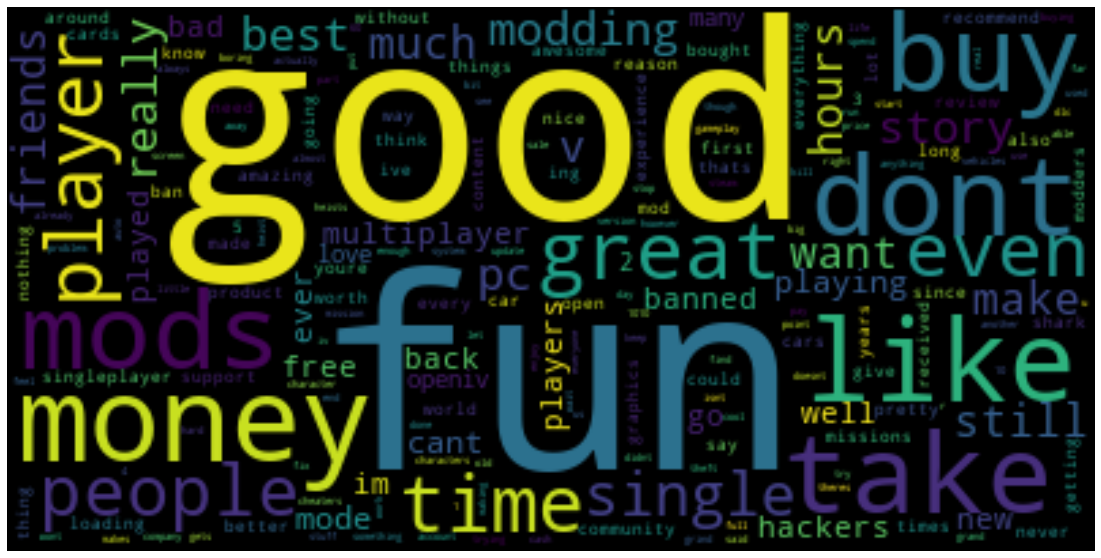

In [10]:
from matplotlib import pyplot as plt 
from wordcloud import WordCloud
from PIL import Image #Keep reading! This library is for a surprise below!
import numpy as np 

wc= WordCloud() #create a word cloud object for drawing
wc.generate_from_frequencies(fdist) #since the fdist variable contains each word with its respective frequency, 
#the generate_from_frequencies attribute is perfect for our word clouds! There are also an option to generate 
#word clouds from raw texts and the wordcloud libary should do all the work for you (although I've never tried
#to do it that way.)

plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear') #matplotlib allows the image to display in our Jupyter notebook.
#Here, I use interpolation as bilinear to smoothen out the output image as I want it to be large enough.

plt.axis('off')
plt.show

## Beautiful! But don't you think this looks dark and cluttered?

What if I want to plot these words on a custom background? You can't talk Grand Theft Auto without talking Liberty City (look it up if you don't play Grand Theft Auto)! So...I'm going to plot the word clouds using the city as the background.

<function matplotlib.pyplot.show(close=None, block=None)>

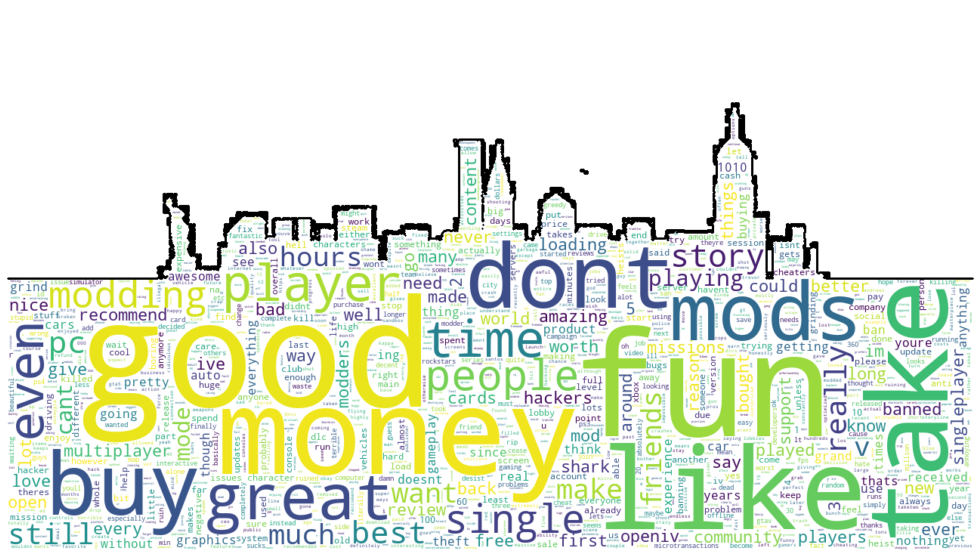

In [11]:
liberty_city= np.array(Image.open('maxresdefault.jpg')) #Load in the image to use as the background for the word clouds

wc= WordCloud(background_color='white', max_words= 2000, mask= liberty_city, contour_width= 3, 
              contour_color= 'black') #Pass in the image to the wordcloud object as "mask", 
#we'll also set the background color to white, and set the outline lines to black color.

wc.generate_from_frequencies(fdist)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show

#Done! Looks so much better, doesn't it?

## Without looking it up first, can you guess what city this is just based on the silhouette?

Looks like Grand Theft Auto V is well received after all! Sure, I could use another method like a scatter plot or barcharts to represent these words, but I believe word clouds are the most effective way to visualize thousand of words and get to the main message.